In [22]:
!pip3 install ipympl

     |████████████████████████████████| 2.0 MB 3.3 MB/s eta 0:00:01
     |████████████████████████████████| 121 kB 27.4 MB/s eta 0:00:01
     |████████████████████████████████| 2.2 MB 23.0 MB/s eta 0:00:01
  Attempting uninstall: widgetsnbextension
    Found existing installation: widgetsnbextension 2.0.0
    Not uninstalling widgetsnbextension at /usr/lib/python3/dist-packages, outside environment /usr
    Can't uninstall 'widgetsnbextension'. No files were found to uninstall.
  Attempting uninstall: ipywidgets
    Found existing installation: ipywidgets 6.0.0
    Not uninstalling ipywidgets at /usr/lib/python3/dist-packages, outside environment /usr
    Can't uninstall 'ipywidgets'. No files were found to uninstall.


In [29]:
#%matplotlib notebook
#%matplotlib widget
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [30]:
with open('../ranking/log.txt') as pfile:
    plines = pfile.readlines()
    
    algs = ["CodeForces", "EloR", "Topcoder", "TrueSkill"]
    mapping = {"CodeforcesSystem": 0, "EloRSystem": 1, "TopCoderSystem": 2, "TrueSkillSPBSystem": 3}
    
    acc = [{}, {}, {}, {}]
    pct = [{}, {}, {}, {}]
    crsent = [{}, {}, {}, {}] 
    time = [{}, {}, {}, {}]
    
    for line in plines:
        try:
            tokens = line.split(' ')
            name = tokens[0]
            rest = ' '.join(tokens[1:])
            
            tokens = rest.split(':')
            params, results = ":".join(tokens[:-1]), tokens[-1]
            def extract_numbers(line):
                import re
                res = re.findall(r'[^0-9](\d+\.*\d*)[^0-9]', line)
                return [float(x) for x in res]

            key = tuple(extract_numbers(params))
            vals = extract_numbers(results)[1:]
            if len(key) == 0 or len(vals) == 0:
                continue
            
            alg_id = mapping[name]
            acc[alg_id][key] = vals[0]
            pct[alg_id][key] = vals[1]
            crsent[alg_id][key] = vals[2]
            time[alg_id][key] = vals[3]
        except:
            pass

In [53]:
from operator import itemgetter

for i in range(len(algs)):
    accuracy, percentile, crossentropy = \
        (list(metric[i].values()) for metric in [acc, pct, crsent])
    aidx, best_acc = max(enumerate(accuracy), key=itemgetter(1))
    pidx, best_per = min(enumerate(percentile), key=itemgetter(1))
    eidx, best_ent = min(enumerate(crossentropy), key=itemgetter(1))
    print(
        """Algorithm type {}:
            \tBest accuracy: {} {}
            \tAverage percentile deviation: {} {}
            \tCross entropy: {} {}
        """.format(algs[i], 
                   best_acc, list(acc[i].keys())[aidx], 
                   best_per, list(pct[i].keys())[pidx], 
                   best_ent, list(crsent[i].keys())[eidx]))

Algorithm type CodeForces:
            	Best accuracy: 71.52877879258936 (100.0, 1.7782794100389228)
            	Average percentile deviation: 37.726221228074756 (100.0, 1.7782794100389228)
            	Cross entropy: 0.5524488907173846 (260.0, 3.1622776601683795)
        
Algorithm type EloR:
            	Best accuracy: 72.93210570113597 (100.0, 10.0, 1.0)
            	Average percentile deviation: 36.95035752145764 (100.0, 10.0, 1.0)
            	Cross entropy: 0.529787872841369 (180.0, 30.0, 1.0)
        
Algorithm type Topcoder:
            	Best accuracy: 72.33447880083911 (1.2589254117941673,)
            	Average percentile deviation: 37.27969017209777 (1.2589254117941673,)
            	Cross entropy: 0.53601547037592 (1.2589254117941673,)
        
Algorithm type TrueSkill:
            	Best accuracy: 69.2194535579882 (0.4, 140.0, 0.0002, 20.0)
            	Average percentile deviation: 38.93318704706829 (0.4, 140.0, 0.0002, 20.0)
            	Cross entropy: 0.6655775938302133 

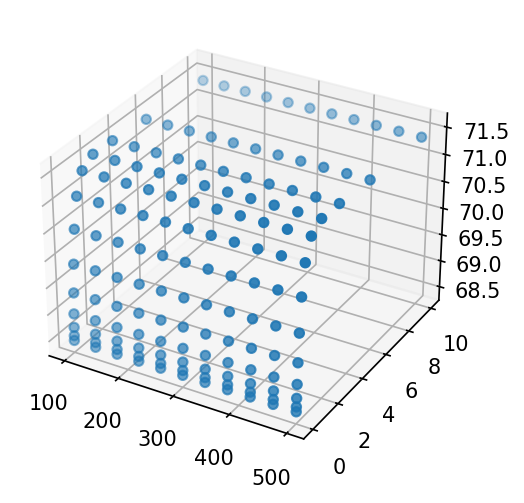

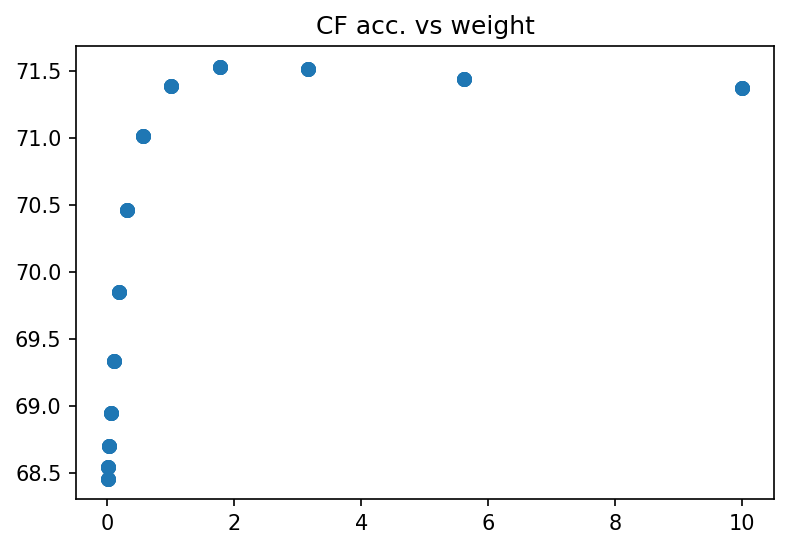

In [32]:
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 150

from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import

# Codeforces
############
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
x, y = zip(*list(acc[0].keys()))
z = list(acc[0].values())
ax.scatter(x, y, z)
plt.show()

# From the plot above, it seems like sig_perf has no effect on codeforces

plt.title("CF acc. vs weight")
plt.scatter(y, z)
plt.show()

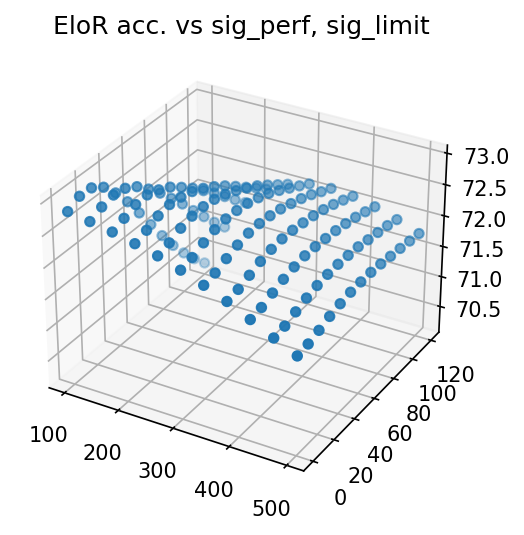

In [33]:
# EloR
######
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
x, y, _ = zip(*list(acc[1].keys()))
z = list(acc[1].values())
ax.scatter(x, y, z)
ax.set_title("EloR acc. vs sig_perf, sig_limit")
plt.show()

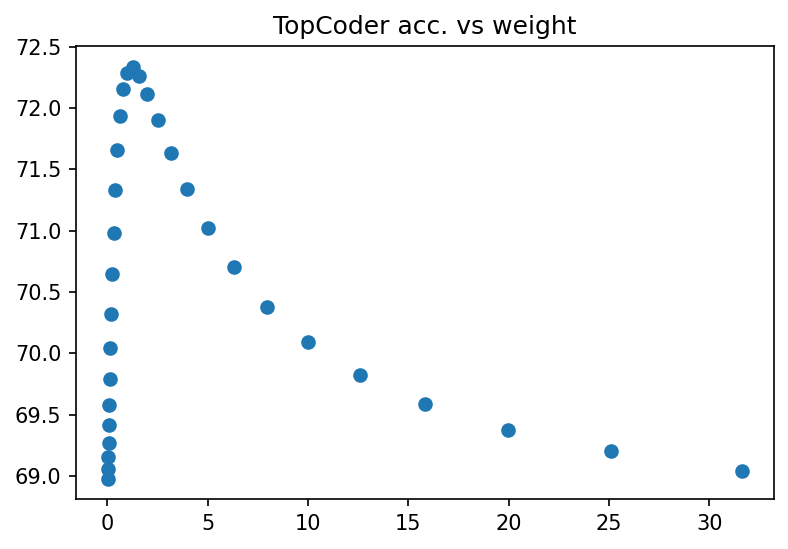

In [34]:
# TopCoder
##########
y = list(acc[2].keys())
z = list(acc[2].values())
plt.scatter(y, z)
plt.title("TopCoder acc. vs weight")
plt.show()

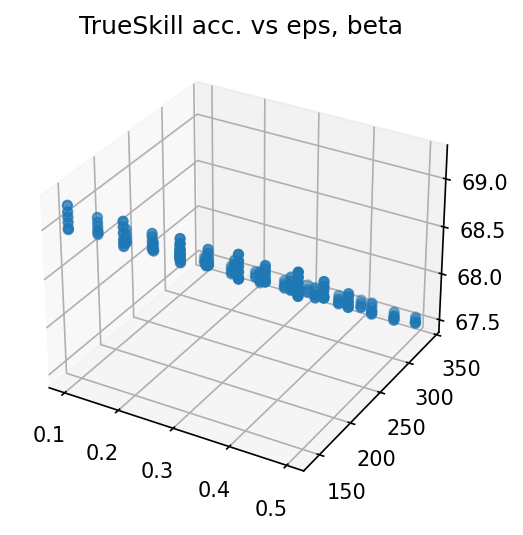

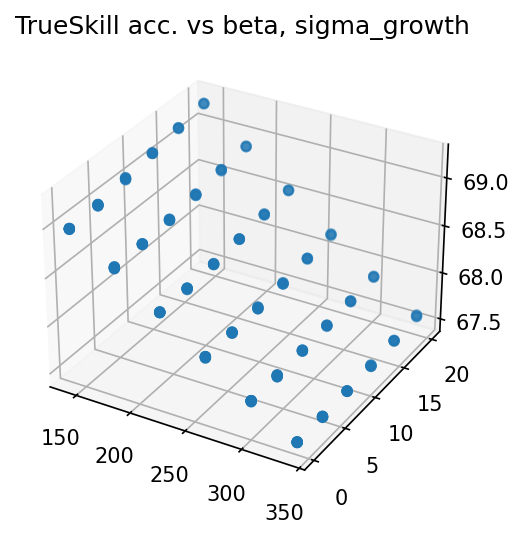

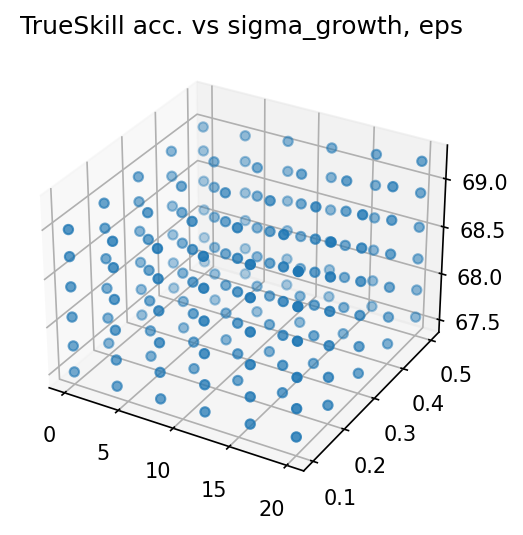

In [35]:
# TrueSkill
###########
eps, beta, _, sigma_growth = zip(*list(acc[3].keys()))
z = list(acc[3].values())

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(eps, beta, z)
ax.set_title("TrueSkill acc. vs eps, beta")
plt.show()

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(beta, sigma_growth, z)
ax.set_title("TrueSkill acc. vs beta, sigma_growth")
plt.show()

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(sigma_growth, eps, z)
ax.set_title("TrueSkill acc. vs sigma_growth, eps")
plt.show()

# Seems fairly insensitive to sigma growth